In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from matplotlib.legend import Legend
from matplotlib import ticker

from PIL import Image
import io

In [9]:
df = pd.read_excel(r"C:\Users\marko\Desktop\Faks\Magistrska_naloga_PAFI\5_DiAna_Distance_analysis\Obrobljene celice zbrani podatki.xlsx",
                  sheet_name = None, header = 0)
df_area_count = pd.read_excel(r"C:\Users\marko\Desktop\Faks\Magistrska_naloga_PAFI\5_DiAna_Distance_analysis\Single cell analiza površine in števila signala v celičnih kompartmentih.xlsx",
                  sheet_name = None, header = 0)
df_area_vse = df_area_count['Vse']
df_area_count_nmo_kir = df_area_count['NMO_Kir'].dropna()
df_area_count_orf_kir = df_area_count['ORF_Kir']
df_area_count_orf_nmo = df_area_count['ORF_NMO']

In [13]:
df_area_vse.head()

,Vzorec,Št. v vzorcu,Kanal,Površina celice,Povr. celice brez periferije,Površina periferije,Povr. jedra,Povr. perinukelarnega,Površina perinuklearnega brez jedra,Št. delcev v celici,Št. delcev v periferiji,Št. delcev v perinuklearnem,Gostota delcev v celotni celici,Gostota v perifernem,Gostota v perinuklearnem,Delež delcev v periferiji,Delež delcev v perinuklearnem delu,Kombinacija
0,20210720_NMO_KIR_2,1,NMO,1972.276,749.920,1222.356,104.611,361.291,256.680,137,121,14,0.069463,0.098989,0.054543,0.883212,0.102190,KIRNMO
1,20210720_NMO_KIR_2,1,KIR,1972.276,749.920,1222.356,104.611,361.291,256.680,518,234,144,0.262641,0.191434,0.561010,0.451737,0.277992,KIRNMO
2,20210720_NMO_KIR_3,1,NMO,2176.376,918.728,1257.648,141.541,566.175,424.634,427,299,24,0.196198,0.237745,0.056519,0.700234,0.056206,KIRNMO
3,20210720_NMO_KIR_3,1,KIR,2176.376,918.728,1257.648,141.541,566.175,424.634,1236,769,399,0.567917,0.611459,0.939633,0.622168,0.322816,KIRNMO
4,20210720_NMO_KIR_4,1,NMO,2330.675,1241.832,1088.843,85.664,337.333,251.669,246,156,54,0.105549,0.143271,0.214568,0.634146,0.219512,KIRNMO


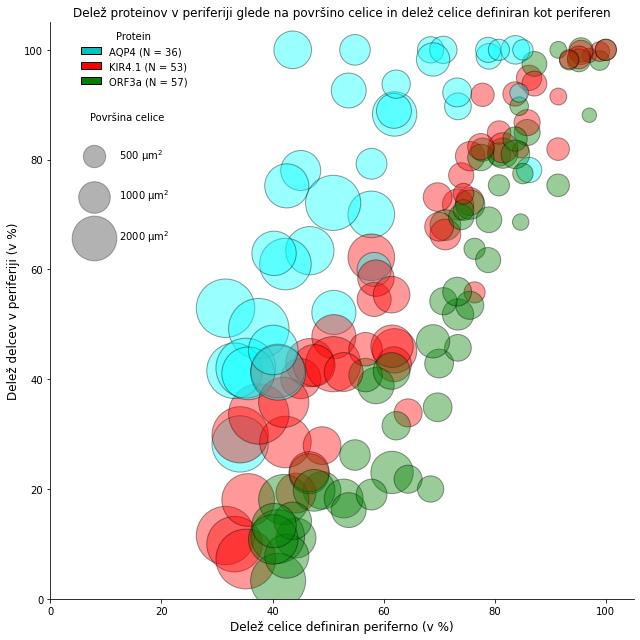

In [4]:
x = [df_area_vse['Površina periferije']/df_area_vse['Površina celice']]
y = 'Delež delcev v periferiji'

Kanal = []

for k in df_area_vse['Kanal']:
    if k == 'KIR':
        Kanal.append('red')
    elif k == 'NMO':
        Kanal.append('cyan')
    else:
        Kanal.append('green')

def plot_scatter_delez_celicnih_kompartmentov():
    fig, ax = plt.subplots(figsize=(9,9))
    _ = plt.scatter(data = df_area_vse,
                    x = x,
                    y = y,
                    alpha = 0.4,
                    s = 'Površina celice',
                    facecolors = 'None',
                    edgecolors = 'black',
                    c = Kanal,
                    label=None
                    )
    
    plt.xlim(0,1.05)
    plt.ylim(0,1.05)
    ax.set_xlabel('Delež celice definiran periferno (v %)', fontsize = 12)
    ax.set_ylabel('Delež delcev v periferiji (v %)', fontsize = 12)
    
    cyan_patch = mpatches.Patch(facecolor='c', label='AQP4 (N = ' + str(Kanal.count('cyan')) + ')', edgecolor = 'black')
    red_patch = mpatches.Patch(facecolor='r', label='KIR4.1 (N = ' + str(Kanal.count('red')) + ')', edgecolor = 'black')
    green_patch = mpatches.Patch(facecolor='g', label='ORF3a (N = ' + str(Kanal.count('green')) + ')', edgecolor = 'black')
    
    supplement_legend = plt.legend(handles=[cyan_patch, red_patch, green_patch], bbox_to_anchor=(0.25, 1), title = 'Protein', frameon=False)
    
    for area in [500, 1000, 2000]:
        plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' μm$^2$')
    plt.legend(scatterpoints=1, frameon=False, labelspacing=2.5, title='Površina celice', handletextpad = 1.5
               , bbox_to_anchor=(0.22, 0.86)
               )
    
    plt.yticks(np.arange(0,1.1,0.2))
    ylabels = ["0",'20','40','60','80','100']
    ax.set_yticklabels(ylabels)
    plt.xticks(np.arange(0,1.1,0.2))
    xlabels = ["0",'20','40','60','80','100']
    ax.set_xticklabels(ylabels)
    
    ax.add_artist(supplement_legend)
    
    plt.title('Delež proteinov v periferiji glede na površino celice in delež celice definiran kot periferen')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    
    plt.style.use('default')
    
    fig.tight_layout()
        
plot_scatter_delez_celicnih_kompartmentov()

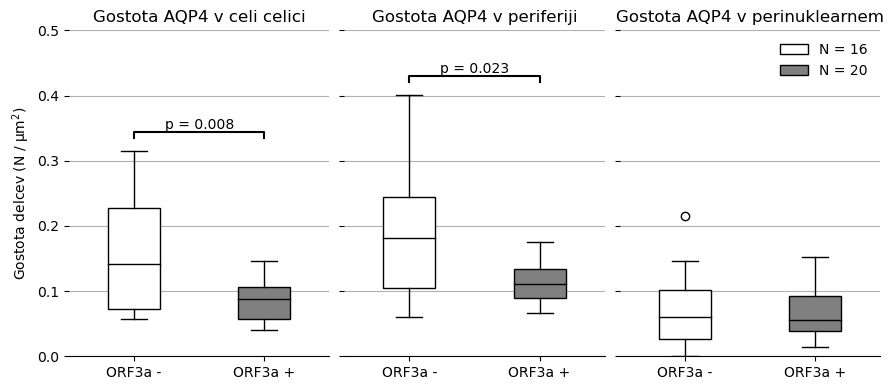

In [7]:
def plot_box_violin_gostota_aqp4_orf():
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(9, 4), sharey=True)
    axes1 = ax1.boxplot([df_area_count_nmo_kir.loc[df_area_count_nmo_kir['Kanal'] == 'NMO', 'Gostota delcev v celotni celici'],
                     df_area_count_orf_nmo.loc[df_area_count_orf_nmo['Kanal'] == 'NMO', 'Gostota delcev v celotni celici']],
                     patch_artist = True,
                     medianprops=dict(color='black'),
                widths = 0.4
                     )
    axes2 = ax2.boxplot([df_area_count_nmo_kir.loc[df_area_count_nmo_kir['Kanal'] == 'NMO', 'Gostota v perifernem'],
                     df_area_count_orf_nmo.loc[df_area_count_orf_nmo['Kanal'] == 'NMO', 'Gostota v perifernem']],
                     patch_artist = True,
                     medianprops=dict(color='black'),
                widths = 0.4
                     )
    axes3 = ax3.boxplot([df_area_count_nmo_kir.loc[df_area_count_nmo_kir['Kanal'] == 'NMO', 'Gostota v perinuklearnem'],
                     df_area_count_orf_nmo.loc[df_area_count_orf_nmo['Kanal'] == 'NMO', 'Gostota v perinuklearnem']],
                     patch_artist = True,
                     medianprops=dict(color='black'),
                widths = 0.4
                     )
    ax1.set_title('Gostota AQP4 v celi celici')
    ax2.set_title('Gostota AQP4 v periferiji')
    ax3.set_title('Gostota AQP4 v perinuklearnem')
    
    ax1.set_ylabel('Gostota delcev (N / μm$^2$)')
    
    labels = ['ORF3a -', 'ORF3a +']
    
    for ax in (ax1,ax2,ax3):
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(False)
        ax.yaxis.grid(True)
        ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
        
        
    red_patch = mpatches.Patch(facecolor='w', label='N = ' + str(len(df_area_count_nmo_kir['Kanal'])//2), edgecolor = 'black')
    green_patch = mpatches.Patch(facecolor='grey', label='N = ' + str(len(df_area_count_orf_nmo['Kanal'])//2), edgecolor = 'black')
    plt.legend(handles=[red_patch, green_patch], loc = 'upper right', frameon = False)
    
    colors = ['white', 'grey']
    for axes in (axes1,axes2,axes3):
        for patch, color in zip(axes['boxes'], colors):
            patch.set_facecolor(color)
        
    plt.ylim([0, 0.5])
    
    x1, x2 = 1, 2   # anotacija za Studentov t-test med celotimi celicami med različnimi označevanji
    y, h, col = df_area_count_nmo_kir.loc[df_area_count_nmo_kir['Kanal'] == 'NMO', 'Gostota delcev v celotni celici'].max() + 0.02, 0.01, 'k'
    ax1.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax1.text((x1+x2)*.5, y+h, "p = 0.008", ha='center', va='bottom', color=col)
    
    x3, x4 = 1, 2   # anotacija za Studentov t-test med celotimi celicami med različnimi označevanji
    y, h, col = df_area_count_nmo_kir.loc[df_area_count_nmo_kir['Kanal'] == 'NMO', 'Gostota v perifernem'].max() + 0.02, 0.01, 'k'
    ax2.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
    ax2.text((x1+x2)*.5, y+h, "p = 0.023", ha='center', va='bottom', color=col)
    
    plt.style.use('default')

    fig.tight_layout()
    
    fig.savefig('plot_box_violin_gostota_aqp4_orf.tiff')
    
plot_box_violin_gostota_aqp4_orf()

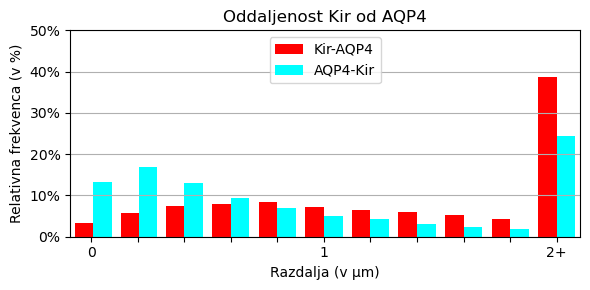

In [10]:
def plot_histogram_nmo_kir_bigger_bins():
    bins = [-0.19,0.01,0.2,0.4,0.6,0.8,1,1.2,1.4,1.6,1.8,2]
    #print(bins)
    fig, ax = plt.subplots(figsize=(6, 3))
    _, bins, patches = plt.hist([np.clip(df['thresh Kir NMO']['Dist min EdgeA-EdgeB'], bins[0], bins[-1]),
                                 np.clip(df['thresh NMO Kir']['Dist min EdgeA-EdgeB'], bins[0], bins[-1])],
                                 density=True,
                                 bins=bins,
                                 label= ['Kir-AQP4', 'AQP4-Kir'], color = ['red', 'cyan'])
    
    xlabels = []
    for i in bins[1:]:
        xlabels.append('')
    xlabels[-1] = '2+'
    xlabels[0] = '0'
    xlabels[5] = '1'
    
    N_labels = len(xlabels)
    plt.xlim([-0.19, 2])
    plt.xticks(0.2 * np.arange(N_labels) - 0.1)
    ax.set_xticklabels(xlabels)

    
    plt.yticks(np.arange(0,3,0.5))
    ylabels = ["0%",'10%','20%','30%','40%','50%']
    ax.set_yticklabels(ylabels)
    plt.title('Oddaljenost Kir od AQP4')
    plt.setp(patches, linewidth=0)
    plt.legend(loc='upper center')
    
    ax.set_xlabel('Razdalja (v μm)')
    ax.set_ylabel('Relativna frekvenca (v %)')
    
    ax.yaxis.grid(True)
    
    plt.style.use('default')
    
    fig.tight_layout()
    
    fig.savefig('histogram_nmo_kir_bigger_bins_slo.tiff')
plot_histogram_nmo_kir_bigger_bins()